# Proyecto Integrador de Aprendizaje.
## Métodos Matemáticos de la Física II.

Tenemos la siguiente ecuación:

\begin{equation}
-\frac{h^2}{2m}\Psi''+\frac{1}{2}m\omega^2x^2\Psi=E\Psi
\end{equation}

Si hacemos $\xi=\sqrt{\frac{m\omega}{\hbar}}x$.

En terminos de $\xi$, tenemos:

\begin{equation}
\frac{d^2\Psi}{d\xi^2}=\left(\xi^2-k\right)\Psi
\end{equation}

Donde $k\equiv\frac{2E}{\hbar\omega}$. Tenemos:

\begin{equation}
\begin{array}{cc}
k=2n+1\longrightarrow E_n=\left(n+\frac{1}{2}\right)\hbar\omega & n=0,1,2,\cdots
\end{array}
\end{equation}

Para resolver este problema, tenemos lo siguiente:

\begin{equation}
\begin{array}{cc}
\Psi(0)=0 & \Psi'(0)=1
\end{array}
\end{equation}

Vamos a resolver la ecuación de Schrodinger.

Aqui solo se agregan librerias a utilizar.

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy import constants
import scipy.special as sp
from time import time
from jupyterthemes import jtplot
#sns.set_style('darkgrid')
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(15, 7))

Esta función es para calcular el tiempo de ejecución.

In [42]:
def tiempo_total(tiempo):
    tiempo_calculado=time()
    tiempo_final=(tiempo_calculado-tiempo)
    if (tiempo_final>3600):
        print('El código tardo %s horas en ejecutarse.' % (tiempo_final/3600))
        print('\n')
    elif (tiempo_final>60):
        print('El código tardo %s minutos en ejecutarse.' % (tiempo_final/60))
        print('\n')
    else:
        print('El código tardo %s segundos en ejecutarse.' % tiempo_final)
        print('\n')

En el siguiente recuadro, se encuentra la función $\Psi(0)$. Tambien pondremos la condición de borde para $\Psi'(0)=1$. 

Para esto, nosotros sabemos que es una condición de Neumman. De igual forma, nosotros planeamos resolver esta ecuación diferencial utilizando un método de Runge-Kutta. Entonces, la función que nos da los valores iniciales es:

In [43]:
def inicial(n):
    psi=np.zeros(n) #Se crea una matriz de valores para Psi.
    Dpsi=np.zeros(n) #Se crea una matriz de valores para Psi.
    psi[0]=0
    Dpsi[0]=1
    return psi,Dpsi

Ahora, comencemos a simular. Esto lo resolveremos con el método de Euler. Para eso, nosotros realizamos lo siguiente:

\begin{equation}
\begin{array}{cc}
\Psi'(x)=\phi
\end{array}
\end{equation}

Hicimos un cambio de variable. Ahora, sabemos que podemos tener una discretización finita de una derivada de la siguiente forma:

\begin{equation}
\begin{array}{c}
\frac{df(x)}{dx}\approx\frac{f(x+dx)-f(x)}{dx} \\
\frac{d^2f(x)}{dx^2}\approx\frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2}
\end{array}
\end{equation}

Por lo tanto, consideramos que $\frac{d^2\Psi(x)}{dx^2}=\frac{\partial\phi}{\partial x}$. Entonces, podemos tener las siguientes dos ecuaciones discretizadas:

\begin{equation}
\begin{array}{c}
\Psi(x+1)=\Psi(x)+\phi(x) \\
\phi(x+1)=\phi(x)+(x^2-k)\Psi(x+1)
\end{array}
\end{equation}

Entonces, podemos programarla si discretizamos la ecuación. En este caso usamos $n=501$ para tener valores muy discretos.


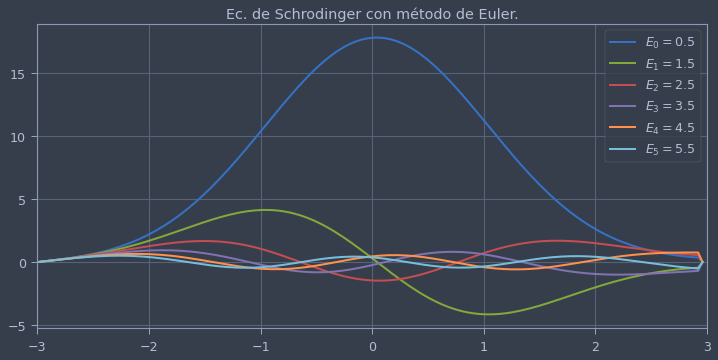

In [44]:
def euler():
    n=151 #el total de valores a obtener
    h=constants.h
    w=1
    x0=-3.0
    xf=3.0
    dx=(xf-x0)/(n)
    x=np.arange(x0,xf,dx)
    Apsi=np.zeros((n,6))
    
    for j in range(0,6):
        psi,Dpsi=inicial(n)
        E=(j+0.5)*(h*w)
        k=(2*E)/(h*w)
    
        for i in range(0,n-1):
            psi[i+1]=psi[i]+dx*Dpsi[i]
            Dpsi[i+1]=Dpsi[i]+dx*(x[i]**2-k)*psi[i+1]
            Apsi[i,j]=psi[i]
        
    fig=plt.figure()
    plt.title('Ec. de Schrodinger con método de Euler.')
    plt.plot(x,Apsi[:,0],lw=2,label='$E_0=0.5$')
    plt.plot(x,Apsi[:,1],lw=2,label='$E_1=1.5$')
    plt.plot(x,Apsi[:,2],lw=2,label='$E_2=2.5$')
    plt.plot(x,Apsi[:,3],lw=2,label='$E_3=3.5$')
    plt.plot(x,Apsi[:,4],lw=2,label='$E_4=4.5$')
    plt.plot(x,Apsi[:,5],lw=2,label='$E_5=5.5$')
    plt.legend()
    plt.xlim(x0,xf)
    plt.show()
euler()

Para comprobar que los resultados sean correctos, podemos calcular los polinomios de hermite para los primeros 5 terminos. Tenemos:

In [45]:
def hermite(x,n):
    if (n==0):
        H=1
    elif (n==1):
        H=-x
    elif (n==2):
        H=0.5*np.exp(0.5*x*2)*(-np.exp(-0.5*x*x) +np.exp(-0.5*x**2)*(x**2))
    elif (n==3):
        H=0.5*np.exp(0.5*x**2)*(3*np.exp(-0.5*x*x)*x-np.exp(-0.5*x*x)*(x**3))
    elif (n==4):
        H=0.5*np.exp(0.5*x*x)*(3*np.exp(-0.5*x*x)-6*np.exp(-0.5*x**2)*(x**2)+np.exp(-0.5*x**2)*(x**4))
    elif (n==5):
        H=0.5*np.exp(0.5*x*x)*(-15*np.exp(-0.5*x*x)*x+10*np.exp(-0.5*x*x)*(x**3)-np.exp(-0.5*x*x)*(x**5))
    
    return H

def factorial(n): 
    factor = 1
    i = 1
    while i <= n:
        factor = factor * i
        i = i + 1
    return factor

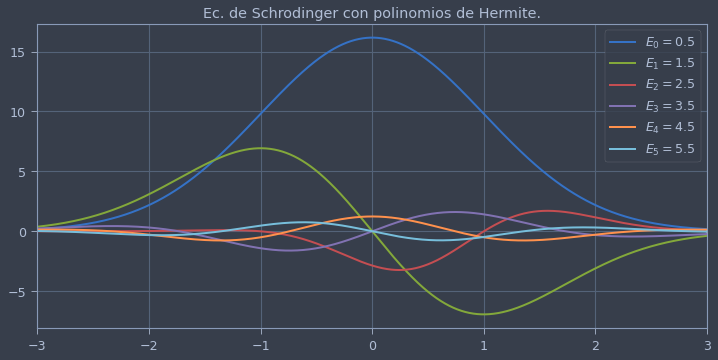

In [47]:
def solucion():
    x0=-3
    xf=3
    Ix=2001
    m=9e-31
    w=8*np.pi
    x=np.linspace(x0,xf,Ix)
    h=constants.hbar
    H=np.zeros(Ix)
    Hg=np.zeros((Ix,6))
    psi=np.zeros((Ix,6))
    for n in range(0,6):
        for i in range(0,Ix-1):
            H[i]=hermite(x[i],n)
            Hg[i,n]=H[i]
            psi[i,n]=(np.sqrt(np.sqrt(((m*w)/(np.pi*h)))
                             )*(1/np.sqrt((2**n)*factorial(n)))*Hg[i,n]*np.exp(
                                                                -0.5*(x[i]**2)))
        #archivo=txt(x,H,Ix,n)
    
    plt.figure()
    plt.title('Ec. de Schrodinger con polinomios de Hermite.')
    plt.plot(x,psi[:,0],lw=2,label='$E_0=0.5$')
    plt.plot(x,psi[:,1],lw=2,label='$E_1=1.5$')
    plt.plot(x,psi[:,2],lw=2,label='$E_2=2.5$')
    plt.plot(x,psi[:,3],lw=2,label='$E_3=3.5$')
    plt.plot(x,psi[:,4],lw=2,label='$E_4=4.5$')
    plt.plot(x,psi[:,5],lw=2,label='$E_5=5.5$')
    plt.xlim(x0,xf)
    plt.legend()
    plt.show()

solucion()